In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
class person:
    def __init__(self, transition_matrix, initial_state, income):
        self.transition_matrix = transition_matrix
        self.current_state = initial_state
        self.income = income
        
    def __iter__(self):
        return self
    
    # not proud of this... but I'm here for the statistical results
    def __next__(self):
        next_state = list(numpy.random.multinomial(
            n = 1, 
            pvals = list(self.transition_matrix[self.current_state].values()),
            size = 1
        )[0]).index(1)
        self.current_state = list(self.transition_matrix[self.current_state].keys())[next_state]
        return self.income[self.current_state]

In [3]:
# use a markov chain to simulate income and employment

In [4]:
person_one = person(
    {
        'employed' : {
            'employed' : 0.90,
            'unemployed' : 0.10
        },
        'unemployed' : {
            'unemployed' : 0.40,
            'employed' : 0.60
        }
    },
    'employed',
    {
        'employed' : 4000,
        'unemployed' : 0
    })

In [5]:
person_two = person(
    {
        'employed' : {
            'employed' : 0.80,
            'unemployed' : 0.20
        },
        'unemployed' : {
            'unemployed' : 0.60,
            'employed' : 0.40
        }
    },
    'employed',
    {
        'employed' : 6000,
        'unemployed' : 0
    })

In [6]:
iterations = 10 * 12

In [7]:
income_history_one = []
income_history_two = []

for iteration in range(iterations):
    income_history_one.append(person_one.__next__())
    income_history_two.append(person_two.__next__())

In [8]:
income_history_total = [x + y for x, y in zip(income_history_one, income_history_two)]

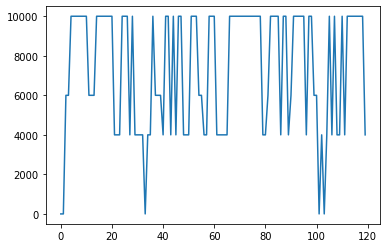

In [9]:
plt.plot(income_history_total)
plt.show()

In [10]:
# priority of payments
# in finance each level is sometimes called a tranch

# using dictionaries as anonymous types... probably bad practise
payment_order = [
    {
        'name': 'tax',
        'cost_per_period': 3000,
        'history': []
    },
    {
        'name': 'food',
        'cost_per_period': 2000,
        'history': []
    },
    {
        'name': 'mortgage',
        'cost_per_period': 2000,
        'history': []
    }
]

In [11]:
# savings / buffering

current_savings = 40000
savings_history = [current_savings]

for income in income_history_total:
    current_savings += income
    for payment in payment_order:
        if current_savings >= payment['cost_per_period']:
            payment['history'].append(payment['cost_per_period'])
            current_savings -= payment['cost_per_period']
        else:
            payment['history'].append(current_savings)
            current_savings = 0
    # the last implicite payment is to our savings
    # this has the lowest precedent
    savings_history.append(current_savings)

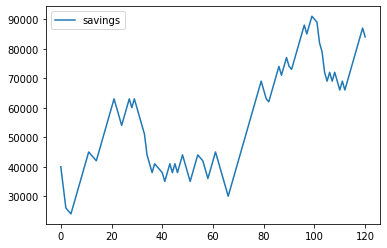

In [12]:
plt.plot(savings_history, label = 'savings')
plt.legend(loc='best')
plt.show()

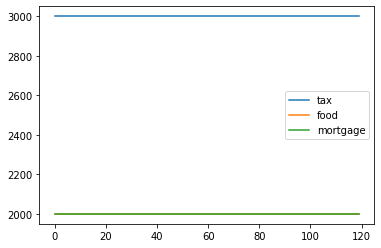

In [13]:
for payment in payment_order:
    plt.plot(payment['history'], label = payment['name'])
plt.legend(loc='best')
plt.show()

In [14]:
# What happens when we have multiple sources of income?

# What happens when we factor in inflation?
# Mortgage payments may remain fixed but food costs increase?

# Out of 100 simulations, how many lead to a mortgage default or worse starvation?

# Can our simulation afford children? A tranch that would have the highest priority.

# Hey Buddy, Uncle Sam wants his cut... Yup, I forgot to include taxes.

# Food for thought:
i = 0.03
n = 25
monthly_payments = 2000

monthly_payments * (1 - (1 + i / 12)**(-n*12)) / (i / 12)

421752.9066799615

In [15]:
# A person can retire, die or get sick